In [45]:
# Import required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from kmodes.kmodes import KModes
import sqlite3
import pyodbc


Establish the connection between Azure SQL Database and DataBricks (Python Enviorenment)

Below code use to connect SQL to Databricks only

In [0]:
connectionString="jdbc:sqlserver://SERVER NAME;database=DATABASE NAME;user=USER NAME;password={PASSWORD};encrypt=true;trustServerCertificate=false;hostNameInCertificate=*.database.windows.net;loginTimeout=30;"

In [ ]:
#Fetch the data from Azure SQL Databse to the Python Enviorenment and convert the data to Data Frame using Pandas Librarey
data=spark.read.jdbc(connectionString,"TABLE NAME")
df=data.select("*").toPandas()
df


If you are use direct connection SQL to Python you need to follow below procedure

In [71]:
#Import pyodbc library and create connection with SQL and Python using below code and inser Server name,database  name,user name & password

import pyodbc
connect=pyodbc.connect(
    
    "Driver={ODBC Driver 17 for SQL Server};"
    "Server=SERVER NAME;"
    "Database=DATABASE NAME;"
    "Uid=USER NAME;"
    "Pwd={PASSWORD};"
    "Encrypt=yes;"
    "TrustServerCertificate=yes;"
    "Connection Timeout=30;"
    
)



In [72]:
#Direct Azure SQL to Python SQL Query to fetch all the data

sql_query= """
SELECT * FROM dbo.UserCSV
"""

In [76]:
# convert SQL data to Pandas data frame

dfdirect=pd.read_sql(sql_query,connect)
dfdirect

,id,user_id,uid,Password_n,FirstName,LastName,username,email,avatar,gender,...,address_street_name,address_street_address,address_zip_code,StateName,Country,creditcard_cc_number,subscription_plan,subscription_status,subscription_payment_method,subscription_term
0,1,8950,e66c4425-f25e-438c-90ac-8192c593343b,4EJkXV3Lyo,Waneta,Kiehn,waneta.kiehn,waneta.kiehn@email.com,https://robohash.org/velitmolestiaeest.png?siz...,Non-binary,...,Renda Circle,134 Dennis Radial,93142,Florida,United States,4.94425E+12,Premium,Blocked,WeChat Pay,Full subscription
1,2,5940,2a5dcdc1-522c-47a2-b7cd-b8481c40ed14,r9JaTV4Dv2,Karl,Auer,karl.auer,karl.auer@email.com,https://robohash.org/officiisperferendisnisi.p...,Female,...,Keebler Meadow,8046 Melvin Plain,18677,North Dakota,United States,6771-8920-5567-5114,Gold,Blocked,Money transfer,Monthly
2,3,4375,78af2b17-09dc-409b-9fe9-8f2a1b82360f,zS1HXfJDWl,Rob,Leannon,rob.leannon,rob.leannon@email.com,https://robohash.org/maximequaeest.png?size=30...,Polygender,...,Devin Springs,4528 Digna Plains,25476,Tennessee,United States,4829-2918-7445-7407,Starter,Pending,Credit card,Full subscription
3,4,6442,958130ec-d5ef-4585-b625-16ab7bc17426,D8KMkW2CZN,Iva,Runte,iva.runte,iva.runte@email.com,https://robohash.org/similiquequasiqui.png?siz...,Genderfluid,...,Eliana Junctions,667 Ritchie Squares,3036,California,United States,4.21766E+12,Free Trial,Pending,Bitcoins,Annual
4,5,9694,7bcfeee5-b10f-45d7-a4ea-63bf36c9dd58,cd04AnGLzZ,Luetta,Brekke,luetta.brekke,luetta.brekke@email.com,https://robohash.org/corruptisaepeofficiis.png...,Bigender,...,Romeo Rapid,796 Olson Trail,27179,New Jersey,United States,4765-7740-5544-1635,Bronze,Pending,Paypal,Annual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,5514,990bebe5-180e-402f-b3ac-3e8a896a089f,rLjBNu87dH,Chuck,Renner,chuck.renner,chuck.renner@email.com,https://robohash.org/eumperferendisiusto.png?s...,Non-binary,...,Ashleigh Shore,26749 Toy Union,95644-1044,New Hampshire,United States,5242-0576-2396-4050,Gold,Active,Debit card,Annual
1050,1051,8262,0a13abdc-5700-4056-b552-8aa46f343ade,37GfulBzSh,Gennie,Wyman,gennie.wyman,gennie.wyman@email.com,https://robohash.org/etvoluptatibusin.png?size...,Genderfluid,...,Pfannerstill Neck,7184 Angelo Fall,60930-5952,Washington,United States,4.46838E+12,Gold,Idle,Cheque,Payment in advance
1051,1052,6796,547b20cb-f2c5-4d71-9d14-4d615ee8f19f,9wmSflhML0,Ian,Daugherty,ian.daugherty,ian.daugherty@email.com,https://robohash.org/adipiscifacerequae.png?si...,Polygender,...,Dung Locks,6072 Towne Key,58530,Kansas,United States,6771-8934-1346-4514,Professional,Active,Apple Pay,Monthly
1052,1053,9365,78552c44-2cbc-4d6d-9e58-f3a35ea4b1de,5XjucCLl6T,Gregory,Rogahn,gregory.rogahn,gregory.rogahn@email.com,https://robohash.org/quaeetomnis.png?size=300x...,Agender,...,Morissette Grove,974 Stevie Dam,62045,New Hampshire,United States,5395-0615-5448-6567,Business,Idle,Bitcoins,Annual


In the data set all of the important data are categorical data such as gender,employee skill,employee skill,subscription plan,statu,payment method,term etc.

In [0]:
# check the shape of the dataset
print(df.shape)

(1054, 26)

Solutions for Part 2-Q1 & Q2

Plot the histogram to check the Gender distribution

    According to the output Highest number of Users are Males and Lowest gender type is Genderfluid

Out[47]:

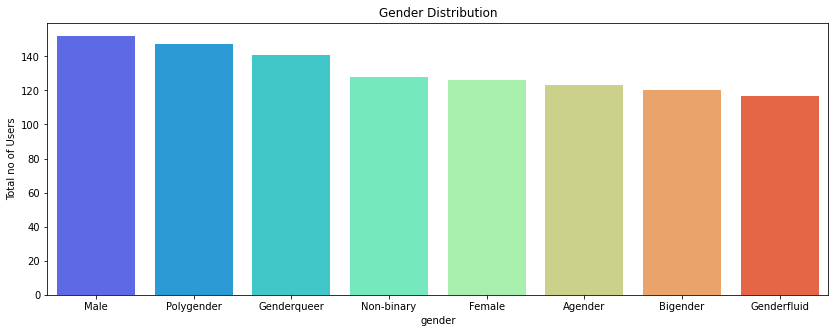

Text(0, 0.5, 'Total no of Users')

In [0]:
plt.figure(figsize=(14,5))
sns.countplot(x='gender',data=df, palette='rainbow',order = df['gender'].value_counts().index)
plt.title("Gender Distribution")
plt.ylabel('Total no of Users')

Analyse the user Employment Title Data

    In the data set there 888 types of Employment titles and Below filter out top 10 Titles only
   
    Marketing consultants,Mining designers,Advertising designers,Consulting coordinators title are highest number of employee titles

Out[48]:

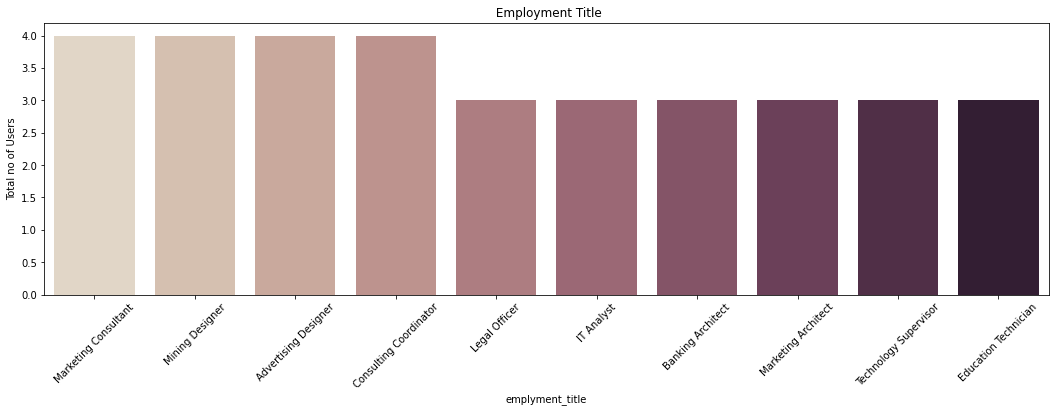

[Text(0, 0, 'Marketing Consultant'),
 Text(1, 0, 'Mining Designer'),
 Text(2, 0, 'Advertising Designer'),
 Text(3, 0, 'Consulting Coordinator'),
 Text(4, 0, 'Legal Officer'),
 Text(5, 0, 'IT Analyst'),
 Text(6, 0, 'Banking Architect'),
 Text(7, 0, 'Marketing Architect'),
 Text(8, 0, 'Technology Supervisor'),
 Text(9, 0, 'Education Technician')]

In [0]:
plt.figure(figsize=(18,5))
chart=sns.countplot(x='emplyment_title',data=df,order = df['emplyment_title'].value_counts().iloc[:10].index, palette='ch:.25')
plt.title(" Employment Title")
plt.ylabel('Total no of Users')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

Analyse the user Employment Key Skill Data

    Self Motivated,Leadership,Networking are the highest employee skills & Technical savy is the least identify skill

Out[49]:

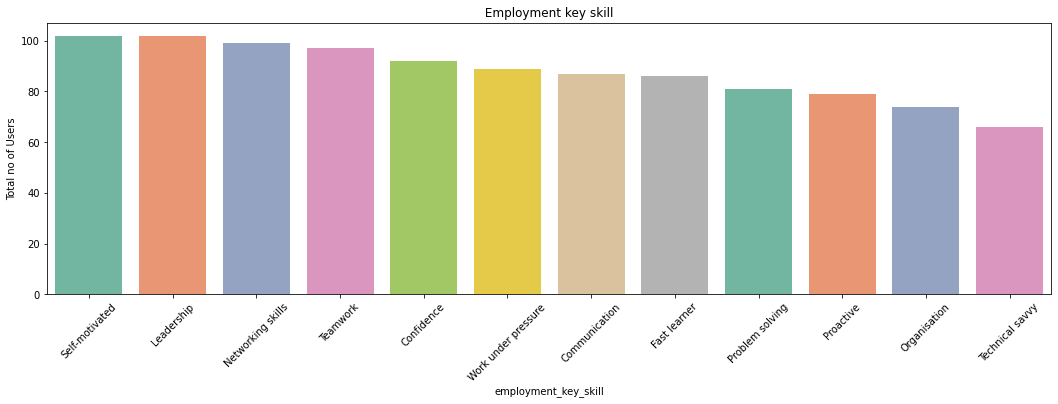

[Text(0, 0, 'Self-motivated'),
 Text(1, 0, 'Leadership'),
 Text(2, 0, 'Networking skills'),
 Text(3, 0, 'Teamwork'),
 Text(4, 0, 'Confidence'),
 Text(5, 0, 'Work under pressure'),
 Text(6, 0, 'Communication'),
 Text(7, 0, 'Fast learner'),
 Text(8, 0, 'Problem solving'),
 Text(9, 0, 'Proactive'),
 Text(10, 0, 'Organisation'),
 Text(11, 0, 'Technical savvy')]

In [0]:
plt.figure(figsize=(18,5))
chart=sns.countplot(x='employment_key_skill',data=df,order = df['employment_key_skill'].value_counts().index, palette='Set2')
plt.title(" Employment key skill ")
plt.ylabel('Total no of Users')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

Plot the histogram to check the Gender distribution by subscription plan

    Males are mostly used subscription plan type is Business

    Most Females,Agender,Bigender are used Free trial version

    Polygenders,Non binary are used Professional plan

    Genderqueer used Gold plan

Out[50]:

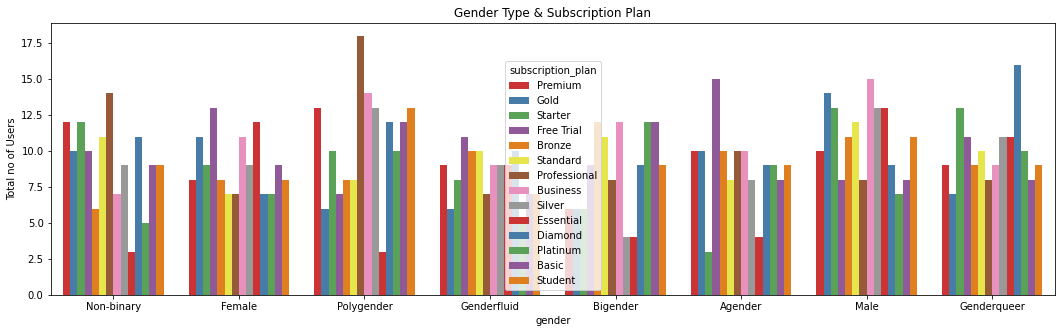

Text(0, 0.5, 'Total no of Users')

In [0]:
plt.figure(figsize=(18,5))
sns.countplot(x='gender',data=df,hue='subscription_plan', palette='Set1')
plt.title("Gender Type & Subscription Plan")
plt.ylabel('Total no of Users')

Plot the histogram to check the Gender distribution by subscription status

    According to graph highest active users are Males & Non binary 

    Most of females are Idle compare to Active status 

    Genderqueer has the highest number which blocked thier subscriptions

Out[51]:

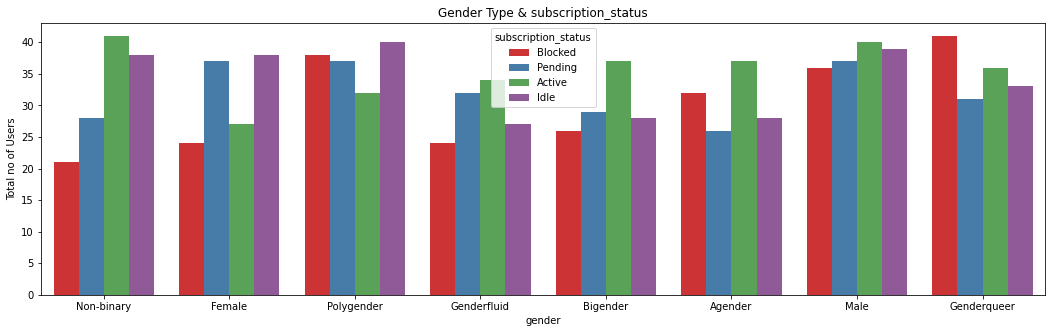

Text(0, 0.5, 'Total no of Users')

In [0]:
plt.figure(figsize=(18,5))
sns.countplot(x='gender',data=df,hue='subscription_status', palette='Set1')
plt.title("Gender Type & subscription_status")
plt.ylabel('Total no of Users')

Plot the histogram to check the Gender distribution by Payment Method

    Most males are prefer the cheques and debit card for the payments

    Polygenders are mostyly use Credit Cards as thier main payment method

    Females  preferes as thier  highest payment method is  Bitcoins

Out[52]:

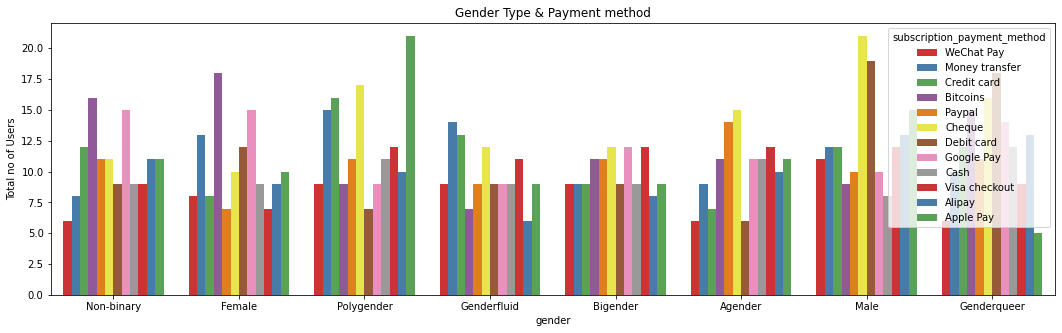

Text(0, 0.5, 'Total no of Users')

In [0]:
plt.figure(figsize=(18,5))
sns.countplot(x='gender',data=df,hue='subscription_payment_method', palette='Set1')
plt.title("Gender Type & Payment method")
plt.ylabel('Total no of Users')

Plot the histogram to check the Gender distribution by Subscription-Term

    Males,Genderqueer,Non binary and polygender are prefer to get full subscription & Payment in Advance
    
    Females are less prefer in advance payment

Out[53]:

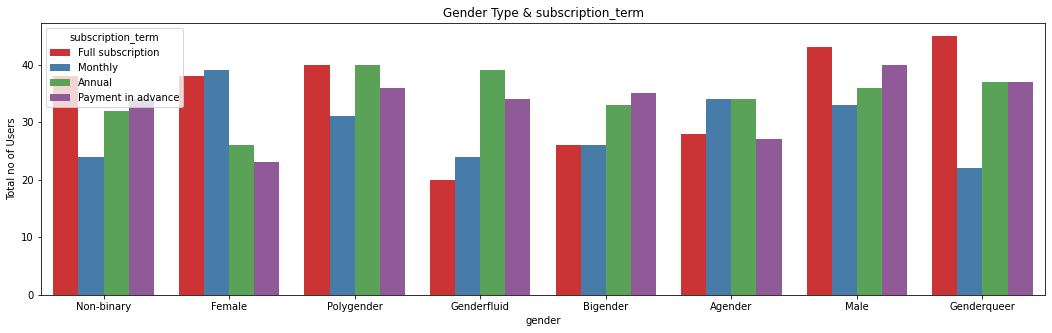

Text(0, 0.5, 'Total no of Users')

In [0]:

plt.figure(figsize=(18,5))
sns.countplot(x='gender',data=df,hue='subscription_term', palette='Set1')
plt.title("Gender Type & subscription_term")
plt.ylabel('Total no of Users')

Plot the histogram to check the Subscription status and payment method

    Active users  are mostly use Google pay and least users use payment method Debit Card
    
    Most block users use thier payment method is Cheques
    
    Subscribers who are idel,most uses Bitcoins

Out[54]:

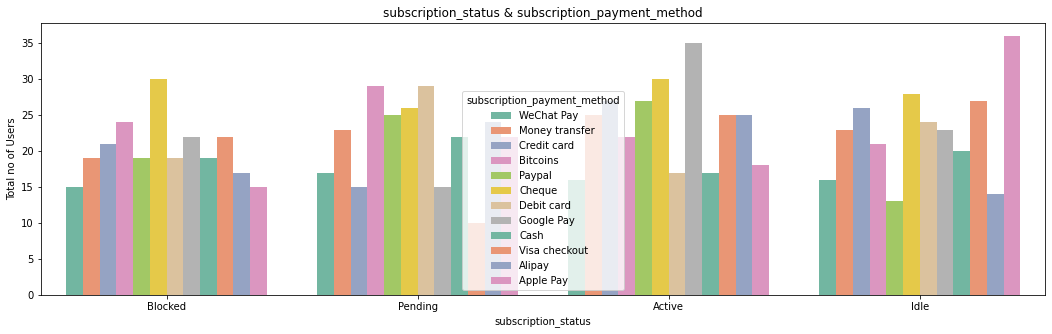

Text(0, 0.5, 'Total no of Users')

In [0]:
plt.figure(figsize=(18,5))
sns.countplot(x='subscription_status',data=df,hue='subscription_payment_method', palette='Set2')
plt.title("subscription_status & subscription_payment_method")
plt.ylabel('Total no of Users')

Pie chart for show the total distribution of no users by subscription status

    According to the pie chart 50% of users  subscription status is Idle and Pending
    
    23% users are Idle and 27% users are Active users

Out[55]:

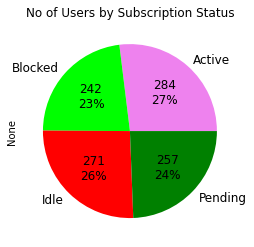

Text(0.5, 1.0, 'No of Users by Subscription Status')

In [0]:
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'

df.groupby('subscription_status').size().plot(kind='pie',autopct=label_function, textprops={'fontsize': 12},
                                 colors=['violet', 'lime','red','green'])
plt.title('No of Users by Subscription Status', size=12)

Identify the top 10  states users live

    Montana has the highest number of Users

Out[56]:

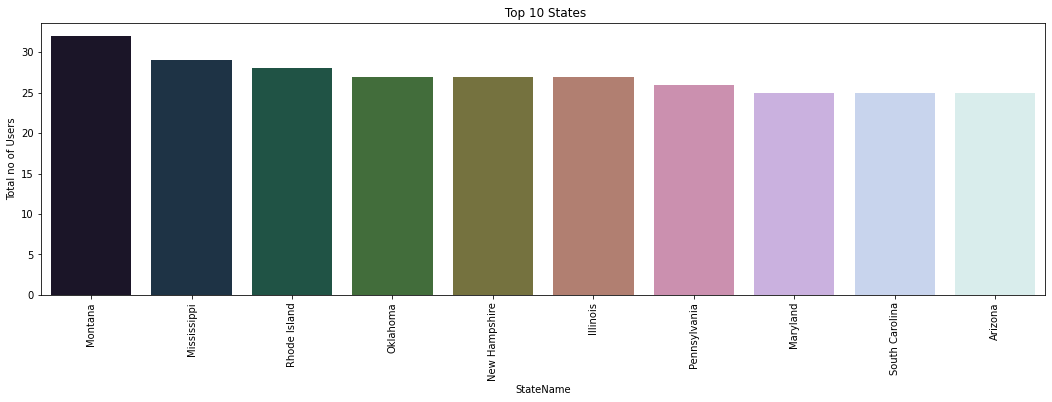

[Text(0, 0, 'Montana'),
 Text(1, 0, 'Mississippi'),
 Text(2, 0, 'Rhode Island'),
 Text(3, 0, 'Oklahoma'),
 Text(4, 0, 'New Hampshire'),
 Text(5, 0, 'Illinois'),
 Text(6, 0, 'Pennsylvania'),
 Text(7, 0, 'Maryland'),
 Text(8, 0, 'South Carolina'),
 Text(9, 0, 'Arizona')]

In [0]:
plt.figure(figsize=(18,5))
chart=sns.countplot(x='StateName',data=df,order = df['StateName'].value_counts().iloc[:10].index, palette='cubehelix')
plt.title(" Top 10 States")
plt.ylabel('Total no of Users')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

Identify the most common First names details (Top 10)

    Robbie is the most common first name and cleo/arron etc is the next common first name

Out[57]:

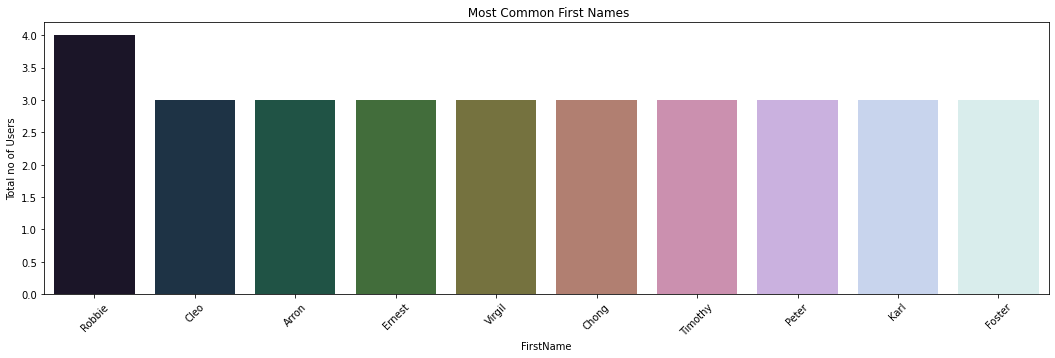

[Text(0, 0, 'Robbie'),
 Text(1, 0, 'Cleo'),
 Text(2, 0, 'Arron'),
 Text(3, 0, 'Ernest'),
 Text(4, 0, 'Virgil'),
 Text(5, 0, 'Chong'),
 Text(6, 0, 'Timothy'),
 Text(7, 0, 'Peter'),
 Text(8, 0, 'Karl'),
 Text(9, 0, 'Foster')]

In [0]:
plt.figure(figsize=(18,5))
chart2=sns.countplot(x='FirstName',data=df,order = df['FirstName'].value_counts().iloc[:10].index, palette='cubehelix')
plt.title(" Most Common First Names")
plt.ylabel('Total no of Users')
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=45)

Most use Last names of the users (Top 10)

    Wilderman is the most commonly use Last name

Out[58]:

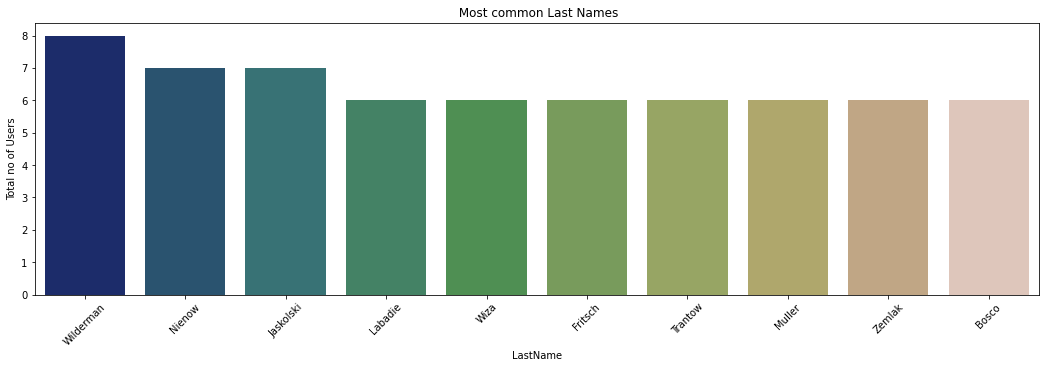

[Text(0, 0, 'Wilderman'),
 Text(1, 0, 'Nienow'),
 Text(2, 0, 'Jaskolski'),
 Text(3, 0, 'Labadie'),
 Text(4, 0, 'Wiza'),
 Text(5, 0, 'Fritsch'),
 Text(6, 0, 'Trantow'),
 Text(7, 0, 'Muller'),
 Text(8, 0, 'Zemlak'),
 Text(9, 0, 'Bosco')]

In [0]:
plt.figure(figsize=(18,5))
chart3=sns.countplot(x='LastName',data=df,order = df['LastName'].value_counts().iloc[:10].index, palette='gist_earth')
plt.title(" Most common Last Names")
plt.ylabel('Total no of Users')
chart3.set_xticklabels(chart3.get_xticklabels(), rotation=45)

Identify the correlation between categorical varibles

    Assumption(H0): The two columns are NOT related to each other
    
    Result of Chi-Sq Test:if the value of Chi-sq test is less than 0.05 we can assume there is correlation between identified two varibales &
    if the value is greater than 0.05 we can assume there is no correlation between given variables

In [0]:
# checking correlation between gender & subscription plan

# Cross tabulation between gender and subscription_plan
CrosstabResult=pd.crosstab(index=df['gender'],columns=df['subscription_plan'])
print(CrosstabResult)
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

subscription_plan Basic Bronze Business ... Standard Starter Student
gender ... 
Agender 8 10 10 ... 8 3 9
Bigender 12 12 12 ... 11 6 9
Female 9 8 11 ... 7 9 8
Genderfluid 7 10 9 ... 10 8 7
Genderqueer 8 9 9 ... 10 13 9
Male 8 11 15 ... 12 13 11
Non-binary 9 6 7 ... 11 12 9
Polygender 12 8 14 ... 8 10 13

[8 rows x 14 columns]
The P-Value of the ChiSq Test is: 0.888330398649698

The P-Value of the ChiSq Test is: 0.888330398649698,hence gender & subscription plan is not correlated

In [0]:
# checking correlation between subscription term and subscription payment method

# Cross tabulation between subscription_term and subscription_payment_method

CrosstabResult=pd.crosstab(index=df['subscription_term'],columns=df['subscription_payment_method'])
print(CrosstabResult)
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

subscription_payment_method Alipay Apple Pay ... Visa checkout WeChat Pay
subscription_term ... 
Annual 17 23 ... 17 12
Full subscription 23 28 ... 21 21
Monthly 19 19 ... 24 14
Payment in advance 21 21 ... 22 17

[4 rows x 12 columns]
The P-Value of the ChiSq Test is: 0.6026003428424316

The P-Value of the ChiSq Test is: 0.6026003428424316,hence subscription_term and subscription_payment_method is not correlated

In [0]:
# checking correlation between subscription_plan & subscription_term 

# Cross tabulation between subscription_plan & subscription_term 

CrosstabResult=pd.crosstab(index=df['subscription_plan'],columns=df['subscription_term'])
print(CrosstabResult)
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)

print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

subscription_term Annual Full subscription Monthly Payment in advance
subscription_plan 
Basic 15 24 17 17
Bronze 18 23 16 17
Business 21 20 19 27
Diamond 29 26 15 13
Essential 18 15 8 18
Free Trial 23 19 18 24
Gold 17 18 16 19
Platinum 19 12 15 19
Premium 19 20 21 17
Professional 19 16 20 25
Silver 29 21 9 17
Standard 19 18 21 19
Starter 20 22 20 12
Student 11 24 18 22
The P-Value of the ChiSq Test is: 0.4137233786082608

The P-Value of the ChiSq Test is: 0.4137233786082608 hence there is no correlation between subscription_plan & subscription_term

In [0]:
# checking correlation between subscription_plan & subscription_status 

# Cross tabulation between subscription_plan & subscription_status 

CrosstabResult=pd.crosstab(index=df['subscription_plan'],columns=df['subscription_status'])
print(CrosstabResult)

 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

subscription_status Active Blocked Idle Pending
subscription_plan 
Basic 20 18 20 15
Bronze 26 13 15 20
Business 20 16 21 30
Diamond 29 17 25 12
Essential 12 14 17 16
Free Trial 24 15 23 22
Gold 23 16 16 15
Platinum 14 20 16 15
Premium 17 26 18 16
Professional 20 17 23 20
Silver 20 16 21 19
Standard 18 11 23 25
Starter 21 23 15 15
Student 20 20 18 17
The P-Value of the ChiSq Test is: 0.5277753429729202

The P-Value of the ChiSq Test is: 0.5277753429729202 hence there is no correlation between subscription_plan & subscription_status

In [0]:
# checking correlation between subscription_plan & StateName 

# Cross tabulation between subscription_plan & StateName

CrosstabResult=pd.crosstab(index=df['StateName'],columns=df['subscription_plan'])
print(CrosstabResult)
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

subscription_plan Basic Bronze Business ... Standard Starter Student
StateName ... 
Alabama 0 2 1 ... 0 0 2
Alaska 2 4 2 ... 0 3 2
Arizona 2 0 3 ... 0 0 1
Arkansas 1 2 3 ... 1 3 3
California 0 2 5 ... 3 1 1
Colorado 2 3 0 ... 1 1 1
Connecticut 0 0 2 ... 1 2 1
Delaware 1 1 0 ... 1 1 1
Florida 1 0 1 ... 0 2 1
Georgia 0 0 2 ... 3 2 1
Hawaii 2 2 0 ... 4 2 1
Idaho 0 2 3 ... 0 0 0
Illinois 3 1 1 ... 3 0 5
Indiana 3 3 0 ... 2 0 2
Iowa 2 2 1 ... 2 1 2
Kansas 2 3 1 ... 1 4 3
Kentucky 2 4 5 ... 2 0 0
Louisiana 4 1 0 ... 3 2 1
Maine 2 2 2 ... 1 2 0
Maryland 4 1 2 ... 2 1 3
Massachusetts 0 2 1 ... 1 2 3
Michigan 2 1 2 ... 1 0 1
Minnesota 1 2 2 ... 2 3 0
Mississippi 0 1 3 ... 1 2 3
Missouri 0 1 1 ... 3 1 2
Montana 1 3 5 ... 3 2 1
Nebraska 0 2 1 ... 1 1 0
Nevada 2 3 1 ... 3 2 1
New Hampshire 3 2 4 ... 1 1 2
New Jersey 3 2 2 ... 1 0 2
New Mexico 4 1 1 ... 2 1 2
New York 0 1 2 ... 0 1 0
North Carolina 3 2 0 ... 0 4 0
North Dakota 1 1 2 ... 2 2 1
Ohio 1 1 3 ... 0 0 2
Oklahoma 1 3 2 ... 1 0 3
Oregon 0 0 0 ... 1 0 1
Pennsylvania 2 1 2 ... 4 0 3
Rhode Island 2 2 3 ... 6 1 0
South Carolina 3 1 2 ... 2 2 1
South Dakota 2 2 2 ... 0 2 1
Tennessee 2 2 1 ... 1 4 2
Texas 3 0 2 ... 2 1 3
Utah 0 0 0 ... 3 1 0
Vermont 0 1 1 ... 1 0 2
Virginia 0 0 2 ... 0 3 3
Washington 1 0 2 ... 2 1 1
West Virginia 0 2 1 ... 0 3 1
Wisconsin 1 0 2 ... 0 4 1
Wyoming 2 0 1 ... 3 3 2

[50 rows x 14 columns]
The P-Value of the ChiSq Test is: 0.8971667040935034

The P-Value of the ChiSq Test is: 0.8971667040935034 hence there is no correlation between subscription_plan & State

In [0]:
# checking correlation between subscription_plan & employee title 

# Cross tabulation between subscription_plan & employee title

CrosstabResult=pd.crosstab(index=df['emplyment_title'],columns=df['subscription_plan'])
print(CrosstabResult)

# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)

print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

subscription_plan Basic Bronze Business ... Standard Starter Student
emplyment_title ... 
Accounting Agent 0 0 0 ... 0 0 0
Accounting Analyst 0 0 0 ... 0 0 0
Accounting Architect 0 0 0 ... 0 0 0
Accounting Assistant 0 0 0 ... 0 0 0
Accounting Coordinator 0 0 0 ... 0 0 0
... ... ... ... ... ... ... ...
Technology Officer 0 0 0 ... 0 0 0
Technology Orchestrator 0 0 0 ... 0 0 0
Technology Representative 0 1 0 ... 0 0 0
Technology Specialist 0 0 0 ... 1 0 0
Technology Supervisor 1 0 0 ... 0 0 0

[888 rows x 14 columns]
The P-Value of the ChiSq Test is: 0.3700476816527415

The P-Value of the ChiSq Test is: 0.3700476816527415 hence there is no correlation between subscription_plan & employee title

In [0]:
# checking correlation between subscription_status & employee title 

# Cross tabulation between subscription_status	 & employee title

CrosstabResult=pd.crosstab(index=df['emplyment_title'],columns=df['subscription_status'])
print(CrosstabResult)

# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

subscription_status Active Blocked Idle Pending
emplyment_title 
Accounting Agent 0 0 1 1
Accounting Analyst 0 1 0 1
Accounting Architect 0 0 0 1
Accounting Assistant 0 0 0 1
Accounting Coordinator 0 0 1 1
... ... ... ... ...
Technology Officer 0 1 0 0
Technology Orchestrator 1 0 0 0
Technology Representative 0 0 0 1
Technology Specialist 0 0 1 0
Technology Supervisor 0 0 1 2

[888 rows x 4 columns]
The P-Value of the ChiSq Test is: 0.4492485038421585

The P-Value of the ChiSq Test is: 0.4492485038421585,hence there is no correlation between subscription_status & employee title

In [0]:
# checking correlation between subscription_term & employee title 

# Cross tabulation between subscription_term & employee title

CrosstabResult=pd.crosstab(index=df['emplyment_title'],columns=df['subscription_term'])
print(CrosstabResult)
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

subscription_term Annual ... Payment in advance
emplyment_title ... 
Accounting Agent 0 ... 1
Accounting Analyst 1 ... 0
Accounting Architect 0 ... 1
Accounting Assistant 1 ... 0
Accounting Coordinator 2 ... 0
... ... ... ...
Technology Officer 0 ... 0
Technology Orchestrator 0 ... 0
Technology Representative 0 ... 0
Technology Specialist 0 ... 0
Technology Supervisor 0 ... 1

[888 rows x 4 columns]
The P-Value of the ChiSq Test is: 0.6662423143078474

The P-Value of the ChiSq Test is: 0.6662423143078474,hence there is no correlation between subscription_term & employee title

In [0]:
# checking correlation between subscription_payment_method & employee title 

# Cross tabulation between subscription_payment_method	 & employee title

CrosstabResult=pd.crosstab(index=df['emplyment_title'],columns=df['subscription_payment_method'])
print(CrosstabResult)
  
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

subscription_payment_method Alipay Apple Pay ... Visa checkout WeChat Pay
emplyment_title ... 
Accounting Agent 0 1 ... 0 0
Accounting Analyst 0 0 ... 0 0
Accounting Architect 0 0 ... 0 0
Accounting Assistant 0 0 ... 0 0
Accounting Coordinator 0 0 ... 0 0
... ... ... ... ... ...
Technology Officer 0 0 ... 0 0
Technology Orchestrator 0 0 ... 0 0
Technology Representative 1 0 ... 0 0
Technology Specialist 0 1 ... 0 0
Technology Supervisor 0 0 ... 0 0

[888 rows x 12 columns]
The P-Value of the ChiSq Test is: 0.3457651247975165

The P-Value of the ChiSq Test is: 0.3457651247975165,hence there is no correlation between payment_method & employee title

In [0]:
# checking correlation between subscription_payment_method & employment_key_skill 

# Cross tabulation between subscription_payment_method	 & employment_key_skill

CrosstabResult=pd.crosstab(index=df['emplyment_title'],columns=df['employment_key_skill'])
print(CrosstabResult)
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

employment_key_skill Communication ... Work under pressure
emplyment_title ... 
Accounting Agent 0 ... 0
Accounting Analyst 1 ... 0
Accounting Architect 0 ... 0
Accounting Assistant 0 ... 0
Accounting Coordinator 0 ... 0
... ... ... ...
Technology Officer 0 ... 0
Technology Orchestrator 0 ... 0
Technology Representative 0 ... 0
Technology Specialist 1 ... 0
Technology Supervisor 1 ... 0

[888 rows x 12 columns]
The P-Value of the ChiSq Test is: 0.6391741156098718

Grouping the customers by identifying similaraties and dissimalrities of the data set (Clustering)

    Identify the suitable categorical data and create anoth Data frame to proceed clustering/grouping

    Use K-mean clustering method

In [0]:
df1=df[['id','user_id','gender','emplyment_title','employment_key_skill','StateName','subscription_plan','subscription_status','subscription_payment_method','subscription_term']]
df1 = df1.set_index('id')
df1

Out[69]:

,user_id,gender,emplyment_title,employment_key_skill,StateName,subscription_plan,subscription_status,subscription_payment_method,subscription_term
id,,,,,,,,,
1,8950,Non-binary,Regional Executive,Teamwork,Florida,Premium,Blocked,WeChat Pay,Full subscription
2,5940,Female,Technology Officer,Networking skills,North Dakota,Gold,Blocked,Money transfer,Monthly
3,4375,Polygender,Community-Services Developer,Work under pressure,Tennessee,Starter,Pending,Credit card,Full subscription
4,6442,Genderfluid,Forward Coordinator,Networking skills,California,Free Trial,Pending,Bitcoins,Annual
5,9694,Bigender,Principal Specialist,Organisation,New Jersey,Bronze,Pending,Paypal,Annual
...,...,...,...,...,...,...,...,...,...
1050,5514,Non-binary,Customer Education Associate,Self-motivated,New Hampshire,Gold,Active,Debit card,Annual
1051,8262,Genderfluid,Manufacturing Liaison,Communication,Washington,Gold,Idle,Cheque,Payment in advance
1052,6796,Polygender,Future Education Engineer,Technical savvy,Kansas,Professional,Active,Apple Pay,Monthly


Draw the plot between  Cost vs No of cluster to draw  Elbow curve to find optimal K value

    For KModes, plot cost for a range of K values. Cost is the sum of all the dissimilarities between the clusters
    
    Select the K where observe an elbow-like bend with a lesser cost value

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 8432.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 8432.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 8432.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 8432.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 8432.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 240, cost: 7950.0
Run 1, iteration: 2/100, moves: 8, cost: 7950.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 118, cost: 7967.0
Run 2, iteration: 2/100, moves: 101, cost: 7966.0
Run 2, iteration: 3/100, moves: 1, cost: 7966.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 169, cost: 7953.0
Run 3, iteration: 2/100, moves: 2, cost: 7953.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 55, cost: 7980.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 35, cost: 7940.0
Best run was number 5
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 17, cost: 7694.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 65, cost: 7676.0
Run 2, iteration: 2/100, moves: 4, cost: 7676.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 267, cost: 7750.0
Run 3, iteration: 2/100, moves: 2, cost: 7750.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 12, cost: 7759.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 264, cost: 7654.0
Run 5, iteration: 2/100, moves: 15, cost: 7653.0
Run 5, iteration: 3/100, moves: 0, cost: 7653.0
Best run was number 5
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 57, cost: 7502.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 78, cost: 7442.0
Run 2, iteration: 2/100, moves: 11, cost: 7442.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 28, cost: 7536.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1, cost: 7512.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 55, cost: 7535.0
Best run was number 2
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 29, cost: 7327.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 12, cost: 7411.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 128, cost: 7375.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 17, cost: 7402.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 69, cost: 7282.0
Best run was number 5
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 28, cost: 7212.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/

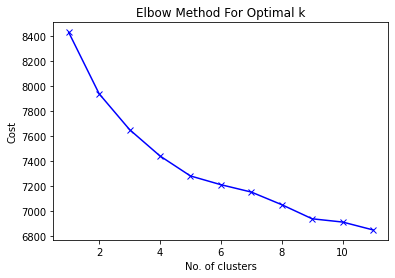

In [0]:
cost = []
K = range(1,12)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(df1)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

Suitable K value is 9 ,according to the gaph

In [0]:
# Building the model with 9 clusters

kmode = KModes(n_clusters=9, init = "random", n_init = 9, verbose=1)
clusters = kmode.fit_predict(df1)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 175, cost: 6953.0
Run 1, iteration: 2/100, moves: 18, cost: 6952.0
Run 1, iteration: 3/100, moves: 0, cost: 6952.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 55, cost: 6980.0
Run 2, iteration: 2/100, moves: 0, cost: 6980.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 10, cost: 7104.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 52, cost: 7022.0
Run 4, iteration: 2/100, moves: 1, cost: 7022.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 191, cost: 6920.0
Run 5, iteration: 2/100, moves: 22, cost: 6920.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 22, cost: 7005.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 230, cost: 6983.0
Run 7, iteration: 2/100, moves: 43, cost: 6983.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 8, iteration: 1/100, moves: 7, cost: 7045.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 9, iteration: 1/100, moves: 51, cost: 7047.0
Run 9, iteration: 2/100, moves: 1, cost: 7047.0
Best run was number 5
Out[71]: array([5, 1, 7, ..., 0, 2, 3], dtype=uint16)

Output table of categorized data

In [0]:
# Apply cluster number to the df1 Table

df1.insert(0, "Cluster", clusters, True)
df1

Out[72]:

,Cluster,user_id,gender,emplyment_title,employment_key_skill,StateName,subscription_plan,subscription_status,subscription_payment_method,subscription_term
id,,,,,,,,,,
1,5,8950,Non-binary,Regional Executive,Teamwork,Florida,Premium,Blocked,WeChat Pay,Full subscription
2,1,5940,Female,Technology Officer,Networking skills,North Dakota,Gold,Blocked,Money transfer,Monthly
3,7,4375,Polygender,Community-Services Developer,Work under pressure,Tennessee,Starter,Pending,Credit card,Full subscription
4,4,6442,Genderfluid,Forward Coordinator,Networking skills,California,Free Trial,Pending,Bitcoins,Annual
5,5,9694,Bigender,Principal Specialist,Organisation,New Jersey,Bronze,Pending,Paypal,Annual
...,...,...,...,...,...,...,...,...,...,...
1050,2,5514,Non-binary,Customer Education Associate,Self-motivated,New Hampshire,Gold,Active,Debit card,Annual
1051,3,8262,Genderfluid,Manufacturing Liaison,Communication,Washington,Gold,Idle,Cheque,Payment in advance
1052,0,6796,Polygender,Future Education Engineer,Technical savvy,Kansas,Professional,Active,Apple Pay,Monthly


Histogram of user clusters

Out[73]:

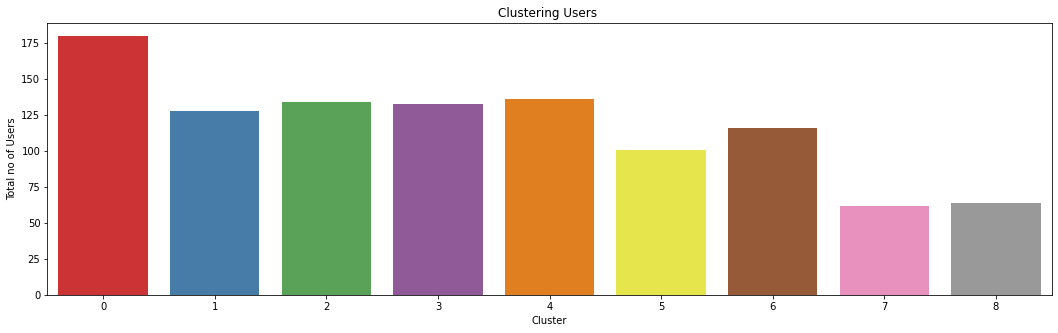

Text(0, 0.5, 'Total no of Users')

In [0]:
#Plot the Histogram to identify the user distribution of each cluster
plt.figure(figsize=(18,5))
sns.countplot(x='Cluster',data=df1,palette='Set1')
plt.title("Clustering Users ")
plt.ylabel('Total no of Users')